**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Alonso Pedrero Martínez
*   MATRÍCULA: A01769076

*   NOMBRE: Salvador D'Carlo Abad Guarro
*   MATRÍCULA: A01017779

*   NOMBRE: Gabriel Sareñana Labra
*   MATRÍCULA: A01795507

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [2]:
PATH = "../files/Cereals.csv"
cereals_df = pd.read_csv(PATH)
display(cereals_df)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [3]:
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [4]:
cereals_df.describe(include = "object").T

,count,unique,top,freq
name,77,77,100%_Bran,1
mfr,77,7,K,23
type,77,2,C,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

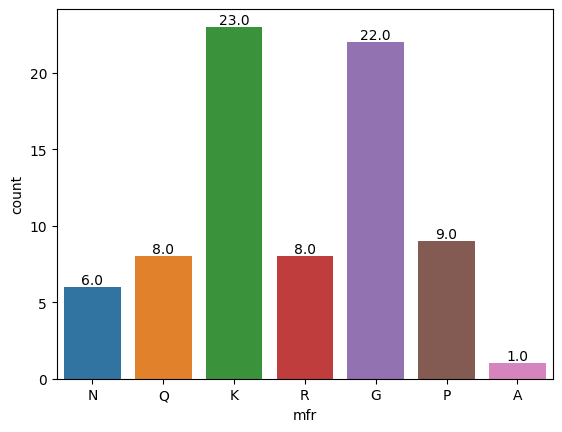

In [5]:
ax = sns.countplot(x="mfr", hue="mfr" ,data=cereals_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

Los distintos fabricantes tienen distintos cereales:
- N: 6 cereales
- Q: 8 cereales
- K: 23 cereales
- R: 8 cereales
- G: 22 cereales
- P: 9 cereales
- A: 1 cereal

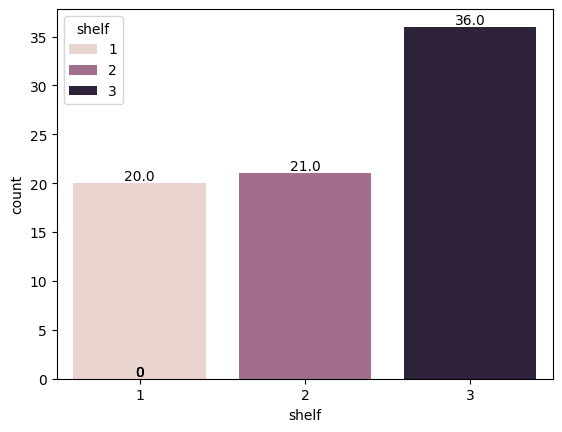

In [6]:
ax = sns.countplot(x="shelf", hue = "shelf",data=cereals_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

En el estante 1 hay 20 productos, en el estante 2 hay 21 productos y en el estante 3 hay 36 productos.

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

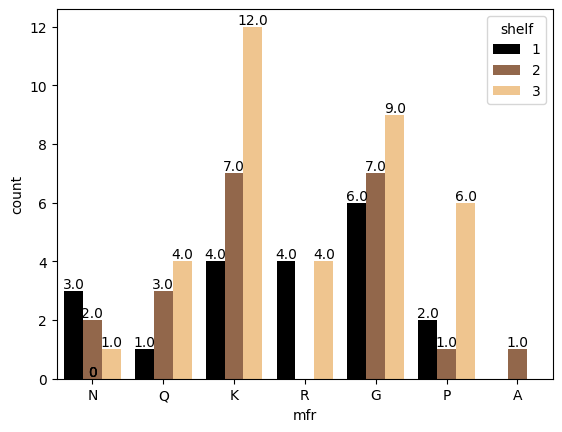

In [7]:
ax = sns.countplot(cereals_df, x="mfr", hue="shelf", palette = "copper")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

Fabricante:
- N: tiene productos en los estantes 1(3 productos), 2(2 productos) y 3(1 productos)
- Q: tiene productos en los estantes 1(1 productos), 2(3 productos) y 3(4 productos)
- K: tiene productos en los estantes 1(4 productos), 2(7 productos) y 3(12 productos)
- R: tiene productos en los estantes 1(4 productos) y 3(4 productos)
- G: tiene productos en los estantes 1(6 productos) ,2(7 productos) y 3(9 productos)
- P: tiene productos en los estantes 1(2 productos), 2(1 productos) y 3(6 productos)
- P: tiene un producto en los estantes 2(1 productos)

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

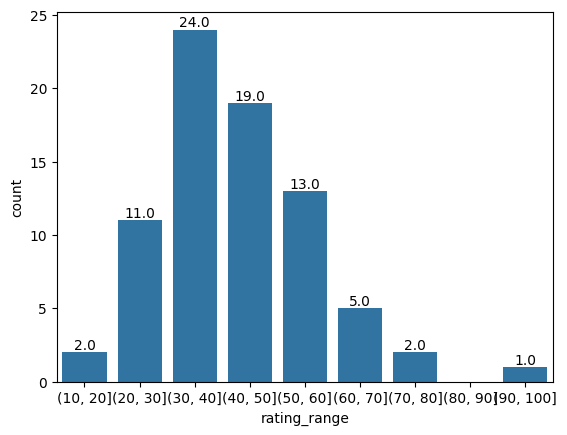

In [8]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ratings = cereals_df['rating']
cereals_categories = pd.cut(ratings, bins)

cereals_categories_df = pd.DataFrame({'rating_range': cereals_categories})

ax = sns.countplot(cereals_categories_df, x="rating_range")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [9]:
cereals_df["rating_range"] = cereals_df["rating"].apply(lambda x: round(x, -1))
display(cereals_df)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_range
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,70.0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,30.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,60.0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,90.0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,40.0
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,30.0
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,50.0
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,50.0


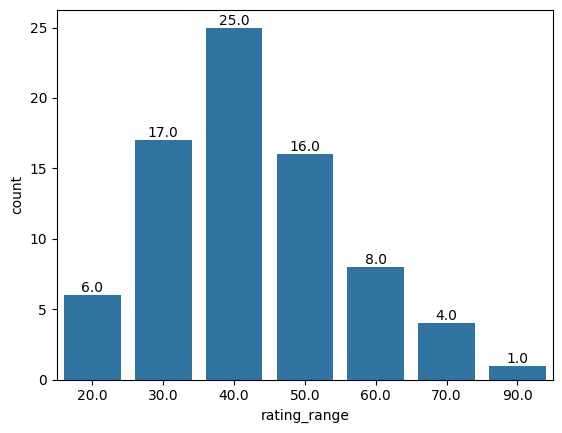

In [10]:
ax = sns.countplot(cereals_df, x="rating_range")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

En la priemra gráfica, el rango más común se encuentra en un rango de 30 a 40 puntos de calificación con la variable rating utilizando la función Cut.

En la segunda gráfica, el rango más comun de las valoraciones de los cereales están cerca de la calificaioón de los 40, esto fue calculado al redondear las calificaiones más cercanas a los múltiplos de 10.

In [11]:
cereals_df = cereals_df.drop(columns="rating_range")

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [12]:
rating_cereals_df = cereals_df.copy(deep = True)
rating_cereals_df = rating_cereals_df.sort_values("rating", ascending = False)
rating_cereals_df = rating_cereals_df[["name", "rating", "mfr"]].head(n = 10)
display(rating_cereals_df)

,name,rating,mfr
3,All-Bran_with_Extra_Fiber,93.704912,K
64,Shredded_Wheat_'n'Bran,74.472949,N
65,Shredded_Wheat_spoon_size,72.801787,N
0,100%_Bran,68.402973,N
63,Shredded_Wheat,68.235885,N
20,Cream_of_Wheat_(Quick),64.533816,N
55,Puffed_Wheat,63.005645,Q
54,Puffed_Rice,60.756112,Q
50,Nutri-grain_Wheat,59.642837,K
2,All-Bran,59.425505,K


In [13]:
rating_cereals_df["mfr"].value_counts()

mfr
N    5
K    3
Q    2
Name: count, dtype: int64

De los cereales con mejores calificaiones, los mejores son los del fabricante N, luego fabricante K y finalmente el fabricante Q.

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

<Axes: xlabel='calories', ylabel='mfr'>

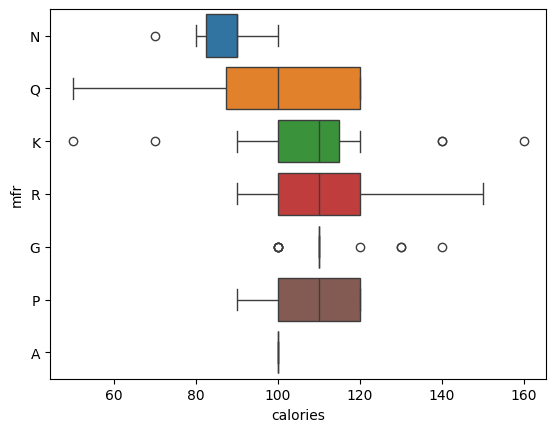

In [14]:
sns.boxplot(x = "calories", y = "mfr", hue = "mfr", data = cereals_df)

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

<Axes: >

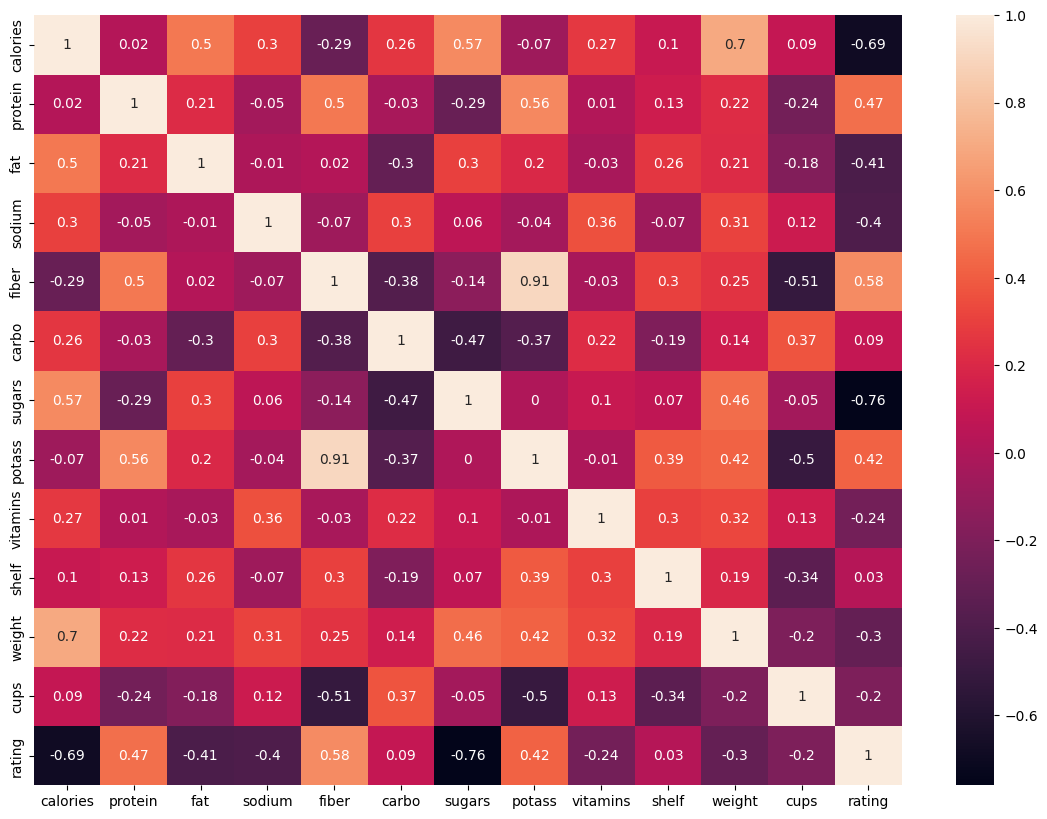

In [15]:
plt.figure(figsize = (14, 10))
sns.heatmap(round(cereals_df.corr(numeric_only=True),2), annot = True)

Las dos variables que tiene mayor correlación con rating son:
- sugars(-0.76): mientras más azúcares tenga el cereal, menor rating tienen.
- calories(-0.69): mientras más calorías tenga, menos rating tienen.

Adicionalmente:
- fiber(0.58): esto indica que mientras mayor contenido de fibra tenga el cereal, mejor el rating.

Esto nos dice que las valoraciones del cereal están ligadas al valor nutricional y la salud de los compradores al escoger un cereal.

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [16]:
print("df antes", len(cereals_df))
cereals_df.dropna(ignore_index = True, inplace = True)
print("df después", len(cereals_df))

df antes 77
df después 74


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [17]:
class AnalysisPCA():
    def variable_selector(self, df_input : pd.DataFrame):
        """
        This method creates X and y variable.
        """
        df = df_input.copy(deep = True)

        y = df.copy(deep = True)
        y = y["rating"]

        X = cereals_df.loc[:, cereals_df.columns != "rating"]
        X_numeric = X.loc[:, X.dtypes != 'object']


        return X_numeric,y


In [18]:
analysisPCA = AnalysisPCA()

In [19]:
X,y = analysisPCA.variable_selector(cereals_df)

In [20]:
display(X)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50
4,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
69,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75
70,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00
71,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67
72,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00


In [21]:
display(y)

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     29.509541
        ...    
69    39.106174
70    27.753301
71    49.787445
72    51.592193
73    36.187559
Name: rating, Length: 74, dtype: float64

In [22]:
escalar = StandardScaler()
X_scaled = escalar.fit_transform(X)

In [23]:
pca = PCA()
x_projected = pca.fit_transform(X_scaled)
x_projected = pd.DataFrame(x_projected)
display(x_projected)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,-0.247787,-0.124799,0.046331,0.238706,0.021342
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0.895201,-0.835394,-0.595071,0.069954,-0.089523
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0.182089,0.139267,0.090776,-0.488302,-0.035570
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0.865569,-0.682678,0.099300,0.708471,0.108198
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,-0.808361,-0.712896,-0.100511,0.093129,-0.076342
...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,0.690165,0.353600,-0.017534,-0.281347,0.108000
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,0.259556,-0.021133,-0.100748,0.107726,0.101983
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,-0.616101,-0.591177,0.112252,-0.107794,0.051736
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,0.009124,-0.604610,-0.008312,0.025462,0.027293


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

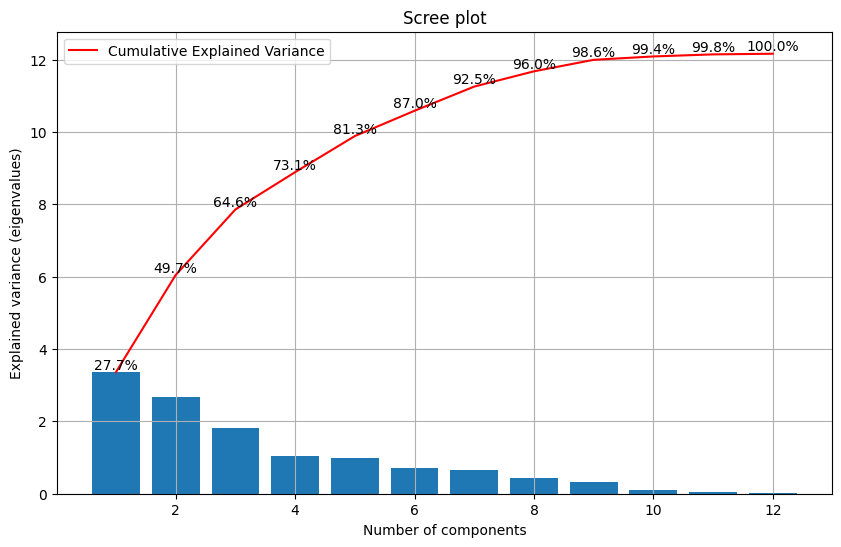

In [24]:
plt.bar(range(1, len(pca.explained_variance_) + 1),
        pca.explained_variance_)

plt.plot(range(1, len(pca.explained_variance_) + 1),
            np.cumsum(pca.explained_variance_),
            c='red',
            label='Cumulative Explained Variance')

labels = np.cumsum(pca.explained_variance_ratio_) * 100
for i in range(len(labels)):
    plt.text(i + 1, np.cumsum(pca.explained_variance_)[i], f'{labels[i]:.1f}%', ha='center', va='bottom')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eigenvalues)')
plt.title('Scree plot')
plt.grid(True)
plt.gcf().set_size_inches(10, 6)
plt.show()

In [25]:
df_varianza_indivudual = pd.DataFrame({"Variable": X.columns, "Varianza individual": pca.explained_variance_ratio_})
df_varianza_indivudual.sort_values(by = "Varianza individual")
display(df_varianza_indivudual)

,Variable,Varianza individual
0,calories,0.276615
1,protein,0.220597
2,fat,0.148835
3,sodium,0.084798
4,fiber,0.082023
5,carbo,0.057482
6,sugars,0.054987
7,potass,0.034672
8,vitamins,0.026144
9,shelf,0.007650


El número mínimo de componentes principales es de 7, ya que a aprtir de este el valor de Cumulative Explained Variance es de 92.8% después del sexto componente.

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [26]:
# Select the number of components
num_components = 1
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = X.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df = pc_df.T
pc_df = pc_df.sort_values(by = "Principal component 1", ascending = False)
pc_df.head(n = 3)

,Principal component 1
potass,0.502603
fiber,0.458623
cups,0.371154


Las variables más importantes en el componente principal 1 fueron: potass, fiber y cups. 

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. Menos shelf

In [27]:
cereals_df.describe(include = "object").T

,count,unique,top,freq
name,74,74,100%_Bran,1
mfr,74,7,K,23
type,74,2,C,73


No todas las variables categóricas son predictores, dependen de lo que representen en el df. En este caso si pueden ser predictores por quienes hacen los cerelaes y la reputación de estos mismos y finalmente el como es la preparación del cereal puede influir al no ser iguales los cereales.


- type: al ser sólo dos, hot y cold, utilizar una sola columna variable de encoding es mejor.
- mfr: binnary para hacer una interpretación de los 7 mfr que hay y asumir esas 7 columnas como una sola interpretación y no es necesario dummies ya que son pocas columnas y datos por lo que tener una columna más no hace mucha diferencia.
- name: no cuenta al ser el nombre de los cereales.

In [28]:
cereals_df["type"].value_counts()

type
C    73
H     1
Name: count, dtype: int64

In [29]:
encoder = OneHotEncoder(sparse=False)
df_encoded_type = pd.DataFrame(encoder.fit_transform(cereals_df[["type"]]), columns=encoder.get_feature_names_out(["type"]))
df_encoded_type["Cold"] = df_encoded_type.apply(lambda row: 1 if row["type_C"] == 1 else 0, axis=1)
df_encoded_type = df_encoded_type.drop(columns=["type_C", "type_H"])
display(df_encoded_type)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Cold
0,1
1,1
2,1
3,1
4,1
...,...
69,1
70,1
71,1
72,1


In [30]:
df_encoded_type.value_counts()

Cold
1       73
0        1
Name: count, dtype: int64

In [31]:
df_encoded_mfr = pd.get_dummies(cereals_df, columns=["mfr"], dtype = int)
df_encoded_mfr = df_encoded_mfr[df_encoded_mfr.columns[df_encoded_mfr.columns.str.startswith('mfr_')]]
display(df_encoded_mfr)

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
69,0,1,0,0,0,0,0
70,0,1,0,0,0,0,0
71,0,0,0,0,0,0,1
72,0,1,0,0,0,0,0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [32]:
x_projected = x_projected.iloc[:, 0:7]
display(x_projected)

,0,1,2,3,4,5,6
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652
...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744


In [33]:
df_concatenated = pd.concat([x_projected, df_encoded_mfr, df_encoded_type, y], axis=1)
display(df_concatenated)

,0,1,2,3,4,5,6,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,Cold,rating
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,0,0,0,1,0,0,0,1,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0,0,0,0,0,1,0,1,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0,0,1,0,0,0,0,1,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0,0,1,0,0,0,0,1,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,0,1,0,0,0,0,0,1,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,-1.520184,0,1,0,0,0,0,0,1,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,0.204196,0,1,0,0,0,0,0,1,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,-0.799693,0,0,0,0,0,0,1,1,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,0.247744,0,1,0,0,0,0,0,1,51.592193


In [34]:
PATH = "../output/df_output_cereals.csv"
df_concatenated.to_csv(PATH)